<a href="https://colab.research.google.com/github/Soy1997/Disease-Prediction/blob/main/Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"soy1997","key":"19f520952bdc0110cc178749ac2816a4"}'}

In [31]:
# Here we create directory where we store dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [32]:
!pip install kaggle

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [34]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 36.1MB/s]


In [35]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [36]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [37]:
# To check empty values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [38]:
# To find all the numeric value
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

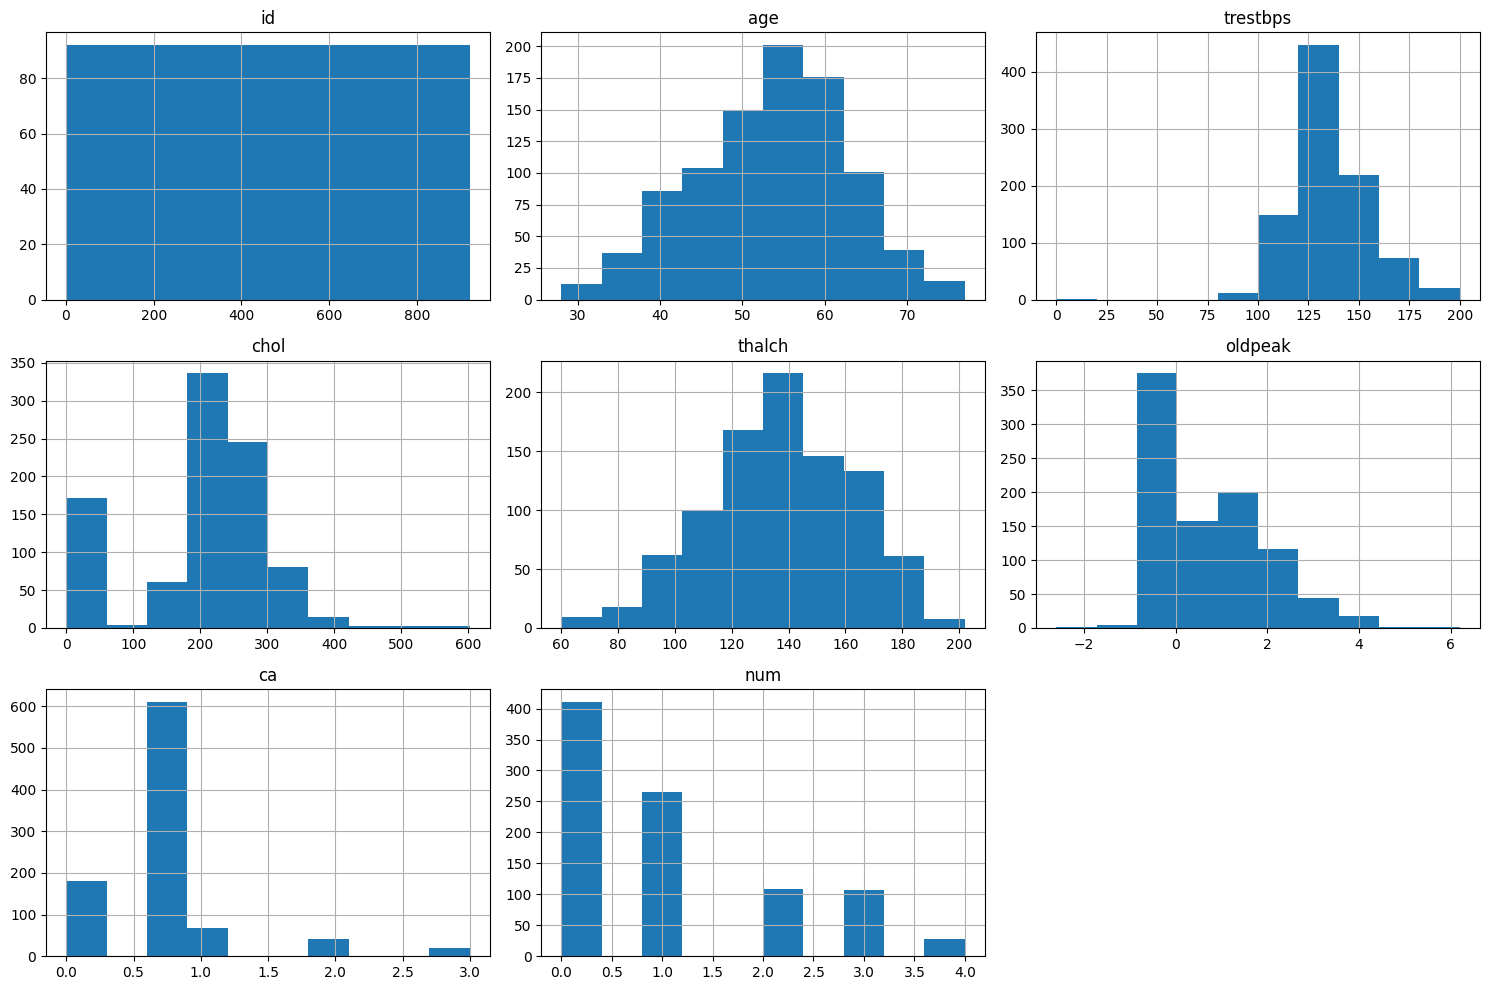

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

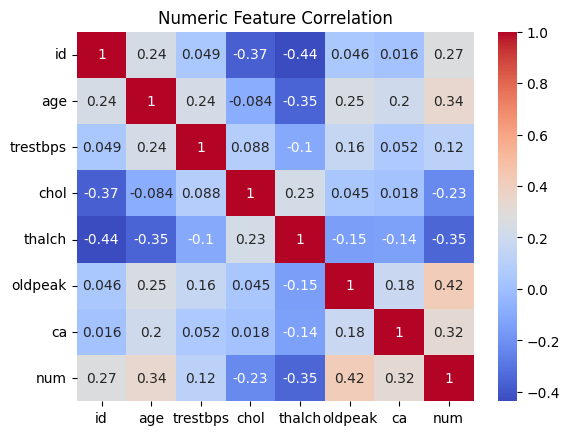

In [40]:
sns.heatmap(df[numeric_cols].corr(), annot=True , cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()

#2. Model Training

In [41]:
# It can convert the text value in num
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [42]:
X= df.drop('num', axis=1)
y= (df['num']>0).astype(int)


In [43]:
X = pd.get_dummies(X , columns=cat_cols)
print("Final feature coloum:",X.columns)

Final feature coloum: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


#3: Train,test , Normalization Modeling and Model Evalution

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

New value = (x-mean)/standard deviation

In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
# It's about clasification
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression() #giving new admission to a new stdudent
lr_model.fit(x_train_scaled,y_train) # Training step


LogisticRegression()

Model Evalution

In [48]:
from sklearn.metrics import accuracy_score , classification_report

In [49]:
y_pred_lr = lr_model.predict(x_test_scaled)
print("Accuracy of Logistic Regression:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Accuracy of Logistic Regression: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Accuracy Score - 75 to 98 considered to be good

#4: Random Forest and Feature Importance

In [50]:
from sklearn.metrics import confusion_matrix

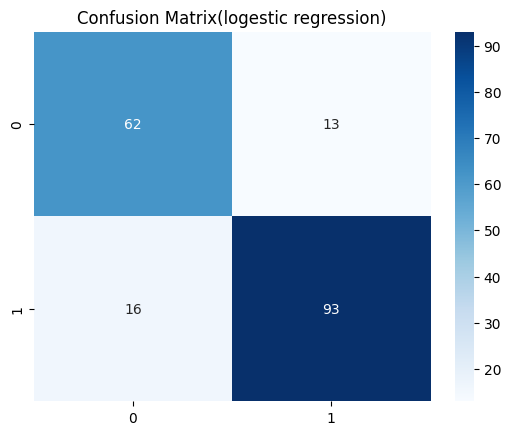

In [51]:
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True , fmt='d',cmap ='Blues')
plt.title('Confusion Matrix(logestic regression)')
plt.show()

Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100 , random_state=42)
rf_model.fit(x_train_scaled,y_train)

y_pred_rf = rf_model.predict(x_test_scaled)
print("Accuracy of Random Forest:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy of Random Forest: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



#Feature Importance

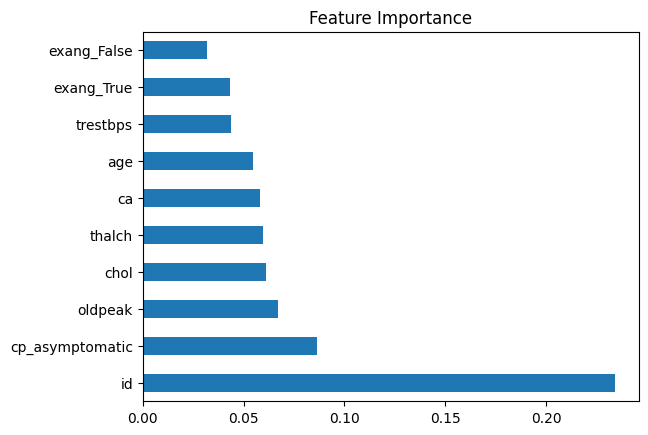

In [56]:
feat_imp = pd.Series(rf_model.feature_importances_,index=x_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Save the model

In [59]:
import joblib
joblib.dump(rf_model,'heart_rf_model.pkl')


['heart_rf_model.pkl']

In [60]:
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [66]:
sample = X.head(1)
sample.to_csv('heart_user_templete.csv',index=False)
print('user templet saved as "heart_user_templete.csv"')

user templet saved as "heart_user_templete.csv"


#User Upload and Prediction

In [67]:
from google.colab import files
uploaded = files.upload()

Saving heart_dataset - heart_dataset.csv.csv to heart_dataset - heart_dataset.csv.csv


In [73]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

# Getting colums list from training dataset
numeric_cols = used_df.select_dtypes(include='number').columns.tolist()
cat_cols = used_df.select_dtypes(include='object').columns.tolist()
bool_cols = used_df.select_dtypes(include='bool').columns.tolist()

#Dropping columns which are extra in user_df then required to avoid error
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

#Fill the missing numeric columns & cat column
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())
for col in cat_cols:
  user_df[col] = user_df[col].fillna('unknown')

for col in bool_cols:
  user_df[col] = user_df[col].fillna(False)

# one-hot encoding cat column
user_df_encoded = pd.get_dummies(user_df,columns=cat_cols)

# Allign column
used_df_encoded = user_df_encoded.reindex(columns=X.columns,fill_value=0)

#Scale data
scaler = joblib.load('heart_scaler.pkl')
used_df_scaled = scaler.transform(used_df_encoded)

#Prediction
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(used_df_scaled)
user_df['Heart_Disease_prediction'] = preds
print(user_df)



   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           